In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [15,8]
from sklearn import metrics
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [38]:
data = pd.read_csv('diabetic_data.csv')
print(data.shape)

(101766, 50)


In [39]:
data3 = data.iloc[:,[40,41,42,43,44,45,46,47,48,49]]
print(data3.shape)
print(data3.columns)

(101766, 10)
Index(['citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [40]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   citoglipton               101766 non-null  object
 1   insulin                   101766 non-null  object
 2   glyburide-metformin       101766 non-null  object
 3   glipizide-metformin       101766 non-null  object
 4   glimepiride-pioglitazone  101766 non-null  object
 5   metformin-rosiglitazone   101766 non-null  object
 6   metformin-pioglitazone    101766 non-null  object
 7   change                    101766 non-null  object
 8   diabetesMed               101766 non-null  object
 9   readmitted                101766 non-null  object
dtypes: object(10)
memory usage: 7.8+ MB


# Exploratory Data Analysis

### Checking the Distribution of all the variables : 
#### All are categorical variable we wil be doing value_counts & countplots to check distribution & check for missing values.

### Univariate Analysis :

No    101766
Name: citoglipton, dtype: int64


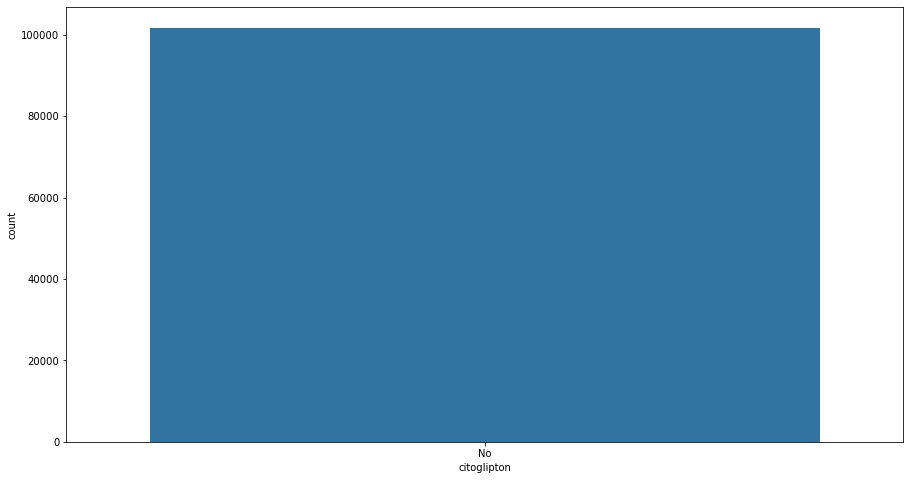

In [41]:
#citoglipton
print(data3.citoglipton.value_counts())
sns.countplot(data3.citoglipton)
plt.show()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64


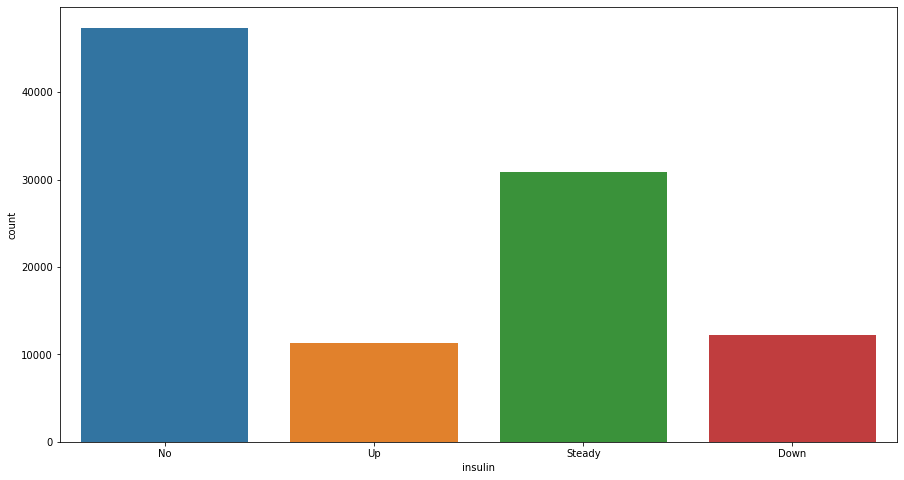

In [42]:
#insulin
print(data3.insulin.value_counts())
sns.countplot(data3.insulin)
plt.show()

No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64


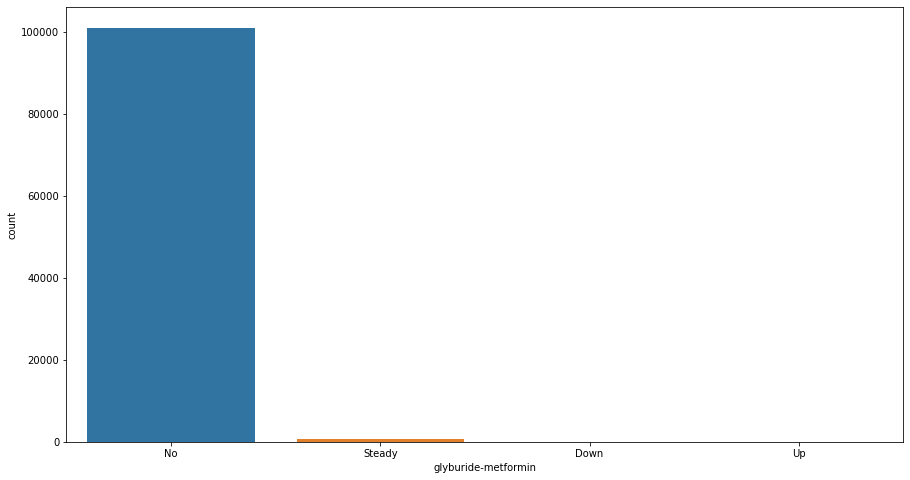

In [43]:
#glyburide-metformin
print(data3['glyburide-metformin'].value_counts())
sns.countplot(data3['glyburide-metformin'])
plt.show()

No        101753
Steady        13
Name: glipizide-metformin, dtype: int64


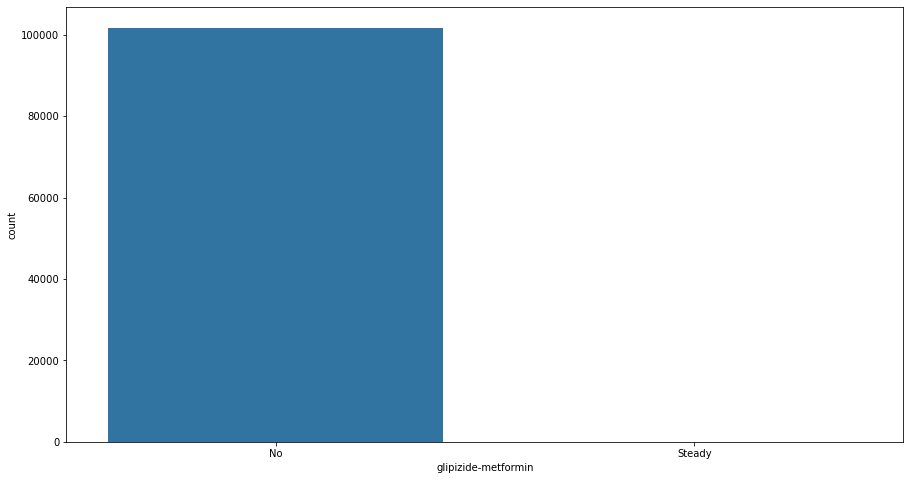

In [44]:
#glipizide-metformin
print(data3['glipizide-metformin'].value_counts())
sns.countplot(data3['glipizide-metformin'])
plt.show()

No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64


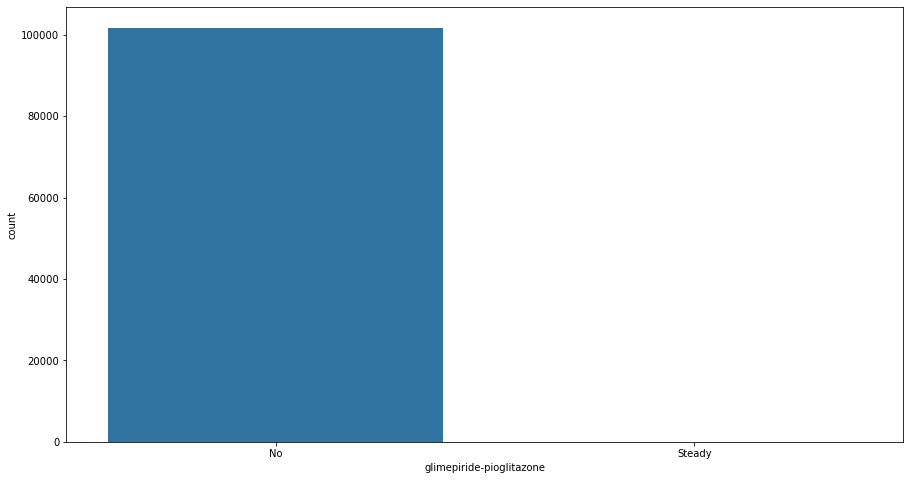

In [45]:
#glimepiride-pioglitazone
print(data3['glimepiride-pioglitazone'].value_counts())
sns.countplot(data3['glimepiride-pioglitazone'])
plt.show()

No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64


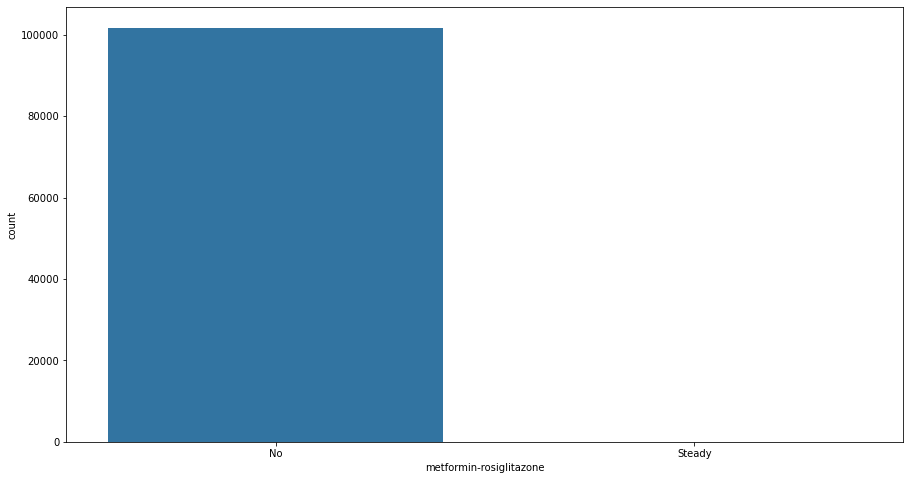

In [46]:
#metformin-rosiglitazone
print(data3['metformin-rosiglitazone'].value_counts())
sns.countplot(data3['metformin-rosiglitazone'])
plt.show()

No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64


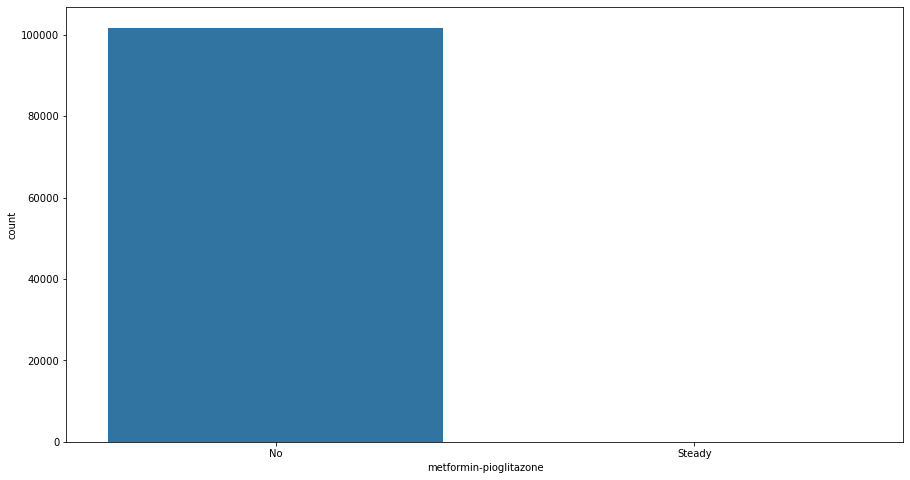

In [47]:
#metformin-pioglitazone
print(data3['metformin-pioglitazone'].value_counts())
sns.countplot(data3['metformin-pioglitazone'])
plt.show()

No    54755
Ch    47011
Name: change, dtype: int64


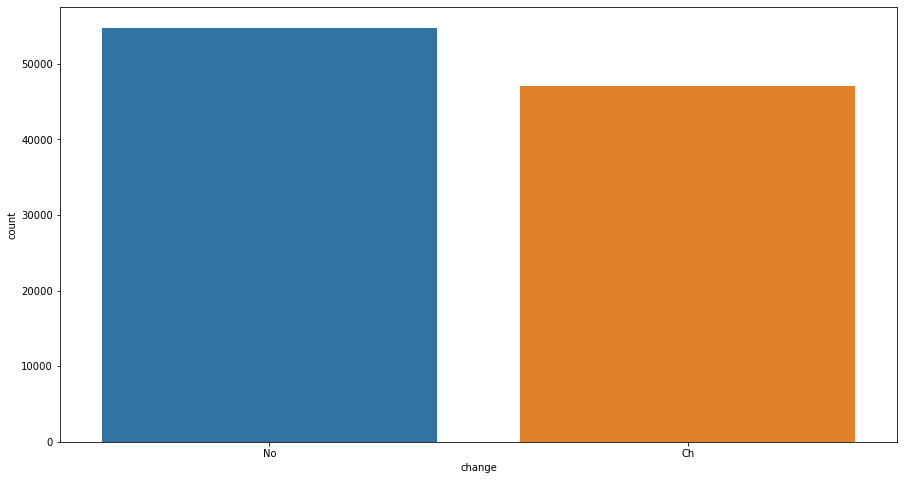

In [48]:
#change
print(data3.change.value_counts())
sns.countplot(data3.change)
plt.show()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64


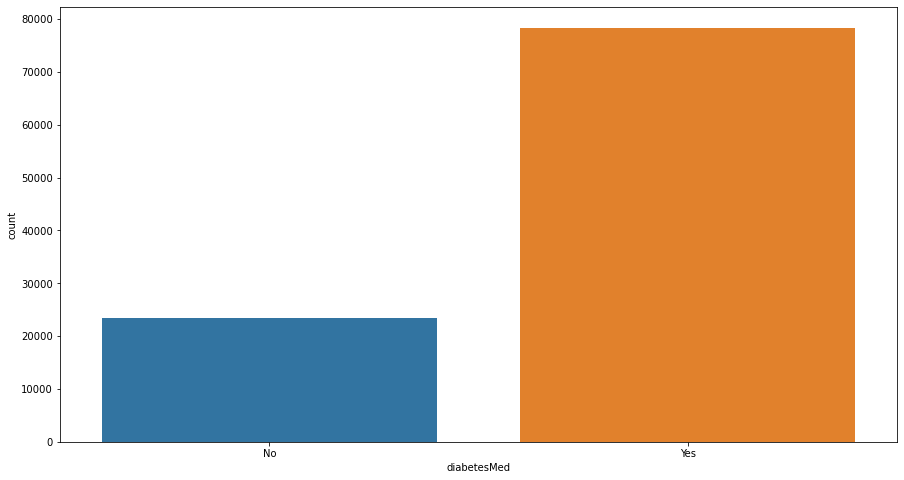

In [49]:
#diabetesMed
print(data3.diabetesMed.value_counts())
sns.countplot(data3.diabetesMed)
plt.show()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


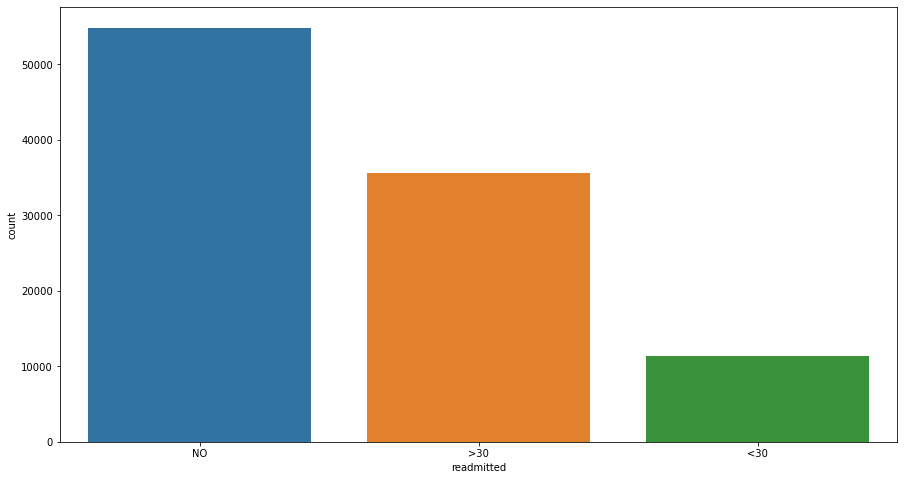

In [50]:
#readmitted
print(data3.readmitted.value_counts())
sns.countplot(data3.readmitted)
plt.show()

# Bivariate Analysis

In [51]:
data3.columns

Index(['citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

readmitted     <30    >30     NO
citoglipton                     
No           11357  35545  54864


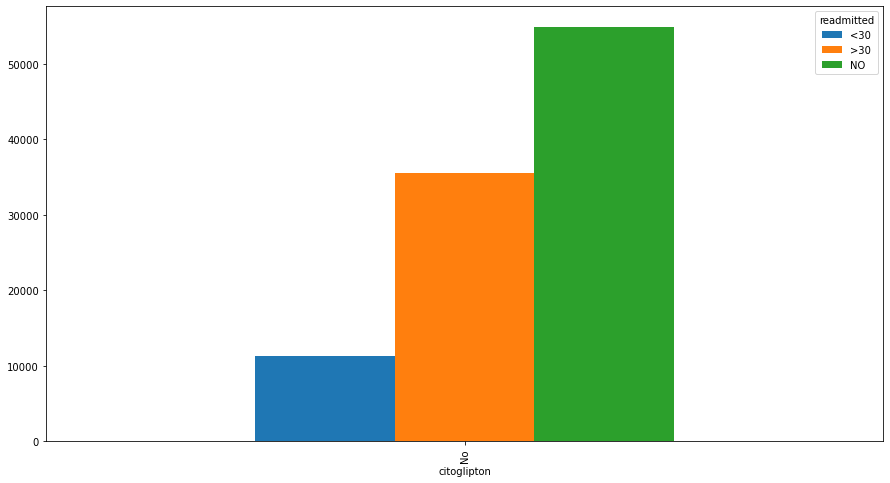

In [52]:
#citoglipton
print(pd.crosstab(data3.citoglipton,data3.readmitted))
pd.crosstab(data3.citoglipton,data3.readmitted).plot(kind='bar')
plt.show()

readmitted   <30    >30     NO
insulin                       
Down        1698   4752   5768
No          4756  15949  26678
Steady      3433  10482  16934
Up          1470   4362   5484


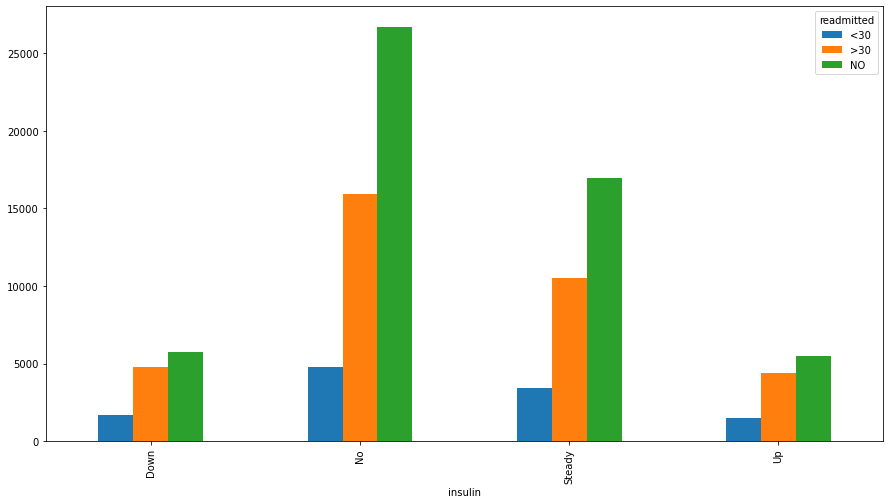

In [53]:
#insulin
print(pd.crosstab(data3.insulin,data3.readmitted))
pd.crosstab(data3.insulin,data3.readmitted).plot(kind='bar')
plt.show()

readmitted             <30    >30     NO
glyburide-metformin                     
Down                     1      0      5
No                   11279  35287  54494
Steady                  77    257    358
Up                       0      1      7


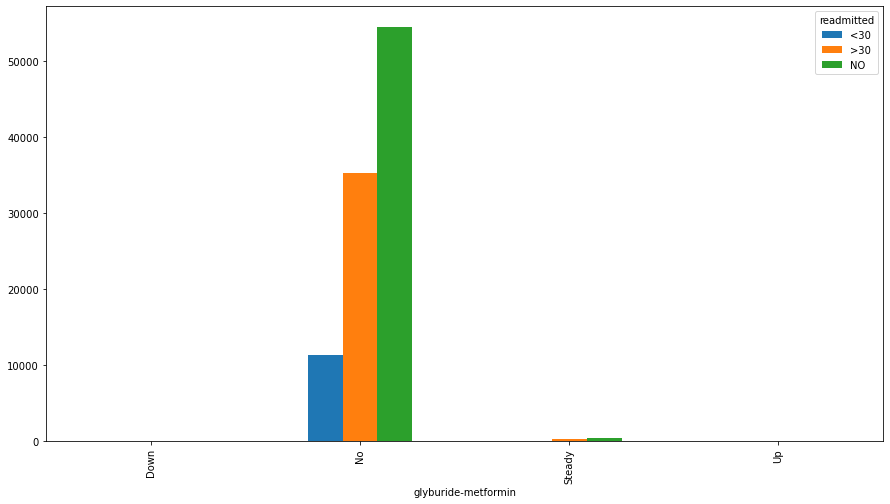

In [54]:
#glyburide-metformin
print(pd.crosstab(data3['glyburide-metformin'],data3.readmitted))
pd.crosstab(data3['glyburide-metformin'],data3.readmitted).plot(kind='bar')
plt.show()

readmitted             <30    >30     NO
glipizide-metformin                     
No                   11356  35538  54859
Steady                   1      7      5


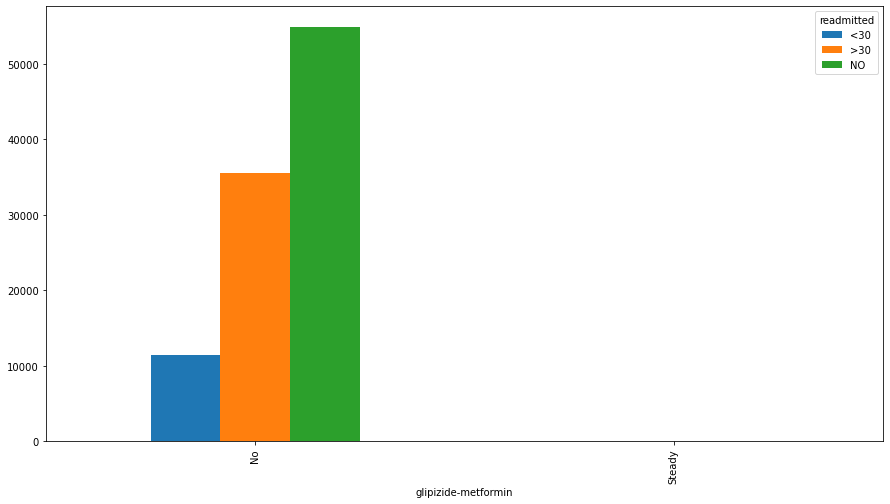

In [55]:
#glipizide-metformin
print(pd.crosstab(data3['glipizide-metformin'],data3.readmitted))
pd.crosstab(data3['glipizide-metformin'],data3.readmitted).plot(kind='bar')
plt.show()

readmitted                  <30    >30     NO
glimepiride-pioglitazone                     
No                        11357  35544  54864
Steady                        0      1      0


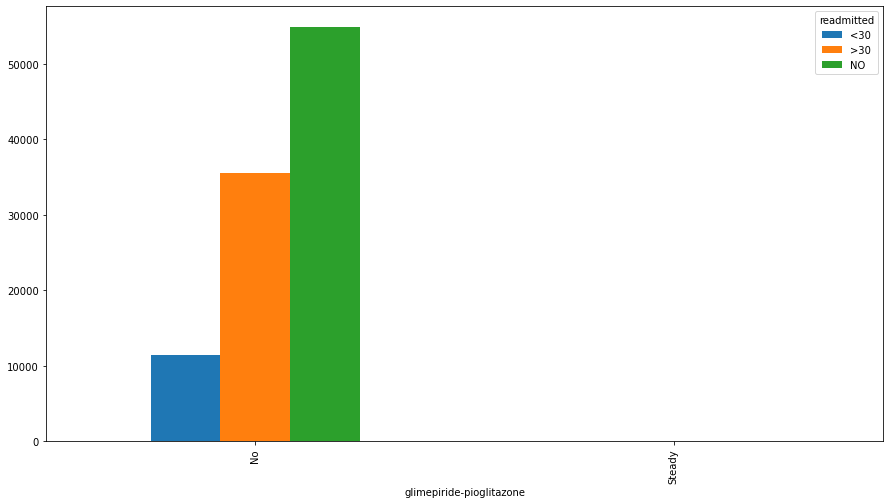

In [56]:
#glimepiride-pioglitazone
print(pd.crosstab(data3['glimepiride-pioglitazone'],data3.readmitted))
pd.crosstab(data3['glimepiride-pioglitazone'],data3.readmitted).plot(kind='bar')
plt.show()

readmitted                 <30    >30     NO
metformin-rosiglitazone                     
No                       11357  35545  54862
Steady                       0      0      2


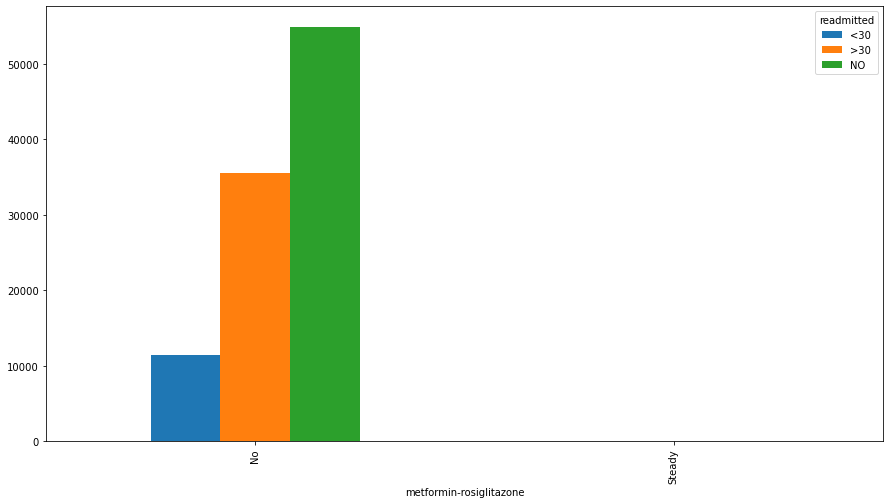

In [57]:
#metformin-rosiglitazone
print(pd.crosstab(data3['metformin-rosiglitazone'],data3.readmitted))
pd.crosstab(data3['metformin-rosiglitazone'],data3.readmitted).plot(kind='bar')
plt.show()

readmitted                <30    >30     NO
metformin-pioglitazone                     
No                      11357  35545  54863
Steady                      0      0      1


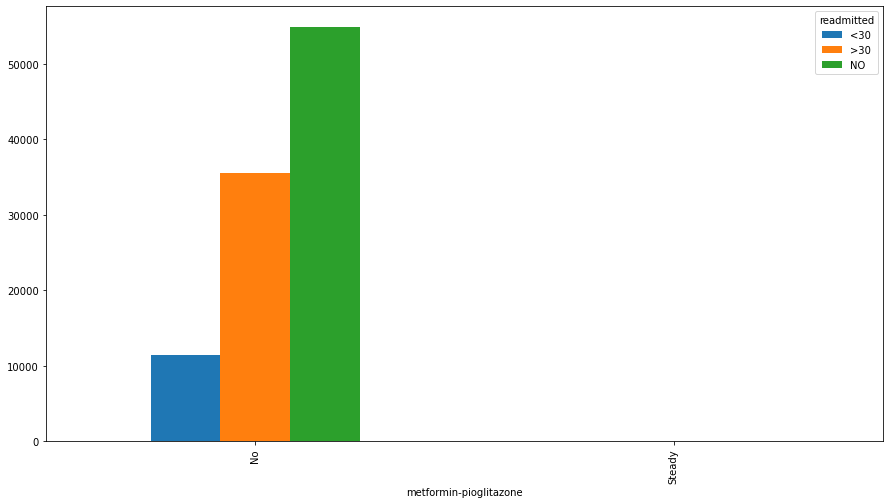

In [62]:
#metformin-pioglitazone
print(pd.crosstab(data3['metformin-pioglitazone'],data3.readmitted))
pd.crosstab(data3['metformin-pioglitazone'],data3.readmitted).plot(kind='bar')
plt.show()

readmitted   <30    >30     NO
change                        
Ch          5558  17272  24181
No          5799  18273  30683


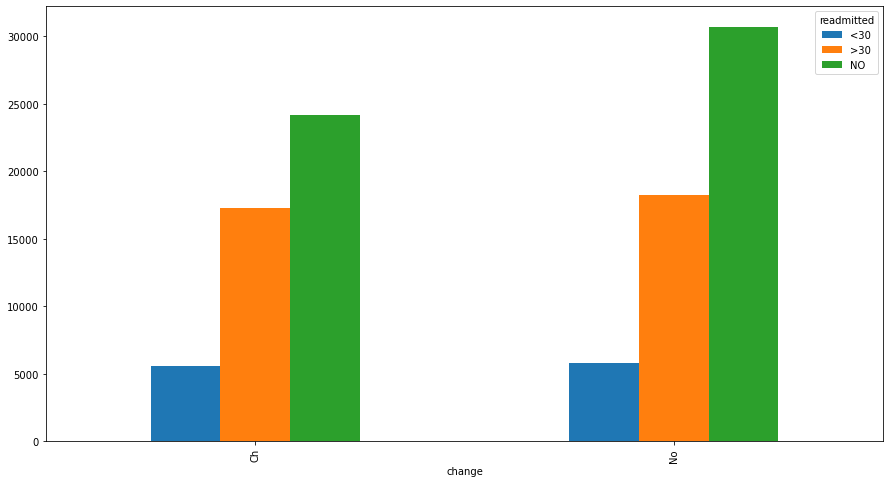

In [59]:
#change
print(pd.crosstab(data3.change,data3.readmitted))
pd.crosstab(data3.change,data3.readmitted).plot(kind='bar')
plt.show()

readmitted    <30    >30     NO
diabetesMed                    
No           2246   7227  13930
Yes          9111  28318  40934


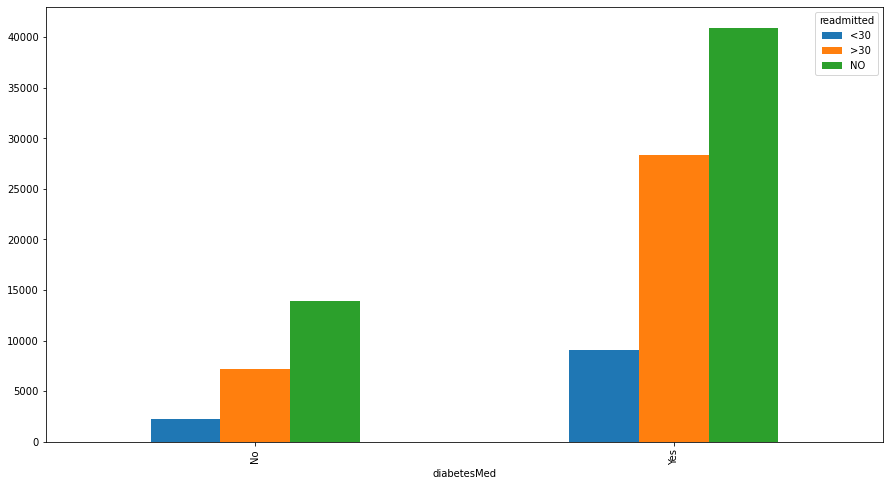

In [60]:
#diabetesMed
print(pd.crosstab(data3.diabetesMed,data3.readmitted))
pd.crosstab(data3.diabetesMed,data3.readmitted).plot(kind='bar')
plt.show()